In [1]:
import sys
sys.path.append("..")
%cd ..

/mnt/sdb1/frasos/DTU/Bachelor2021


In [2]:
from DataPrep.load_data import load_data
import keras
from keras import Sequential, Model
from keras.layers import Dense, LSTM, Dropout, Input, Reshape
import pyforest
from tensorflow.keras import regularizers
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
cmap = plt.cm.bone
rmap = plt.cm.Reds


Using TensorFlow backend.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
df = load_data()

In [4]:
df.columns

Index(['Label', 'Charging Time (mins)', 'Parking Time (mins)', 'Energy (kWh)',
       'Fee (USD)', '# Professional & Other Places', '# Food',
       '# Shop & Service', '# Travel & Transport', '# Outdoors & Recreation',
       '# Arts & Entertainment', '# Nightlife Spot', '# Residence',
       '# College & University', '# Event', 'Plugs', 'Label_0', 'Label_1',
       'Label_2', 'Label_3', 'Label_4', 'Label_5', 'Label_6', 'Label_7',
       'Month_Day_1', 'Month_Day_2', 'Month_Day_3', 'Month_Day_4',
       'Month_Day_5', 'Month_Day_6', 'Month_Day_7', 'Month_Day_8',
       'Month_Day_9', 'Month_Day_10', 'Month_Day_11', 'Month_Day_12',
       'Month_Day_13', 'Month_Day_14', 'Month_Day_15', 'Month_Day_16',
       'Month_Day_17', 'Month_Day_18', 'Month_Day_19', 'Month_Day_20',
       'Month_Day_21', 'Month_Day_22', 'Month_Day_23', 'Month_Day_24',
       'Month_Day_25', 'Month_Day_26', 'Month_Day_27', 'Month_Day_28',
       'Month_Day_29', 'Month_Day_30', 'Month_Day_31', 'Week_Day_0',
       

In [5]:
df.head()

,Label,Charging Time (mins),Parking Time (mins),Energy (kWh),Fee (USD),# Professional & Other Places,# Food,# Shop & Service,# Travel & Transport,# Outdoors & Recreation,...,Year_Month_3,Year_Month_4,Year_Month_5,Year_Month_6,Year_Month_7,Year_Month_8,Year_Month_9,Year_Month_10,Year_Month_11,Year_Month_12
Date,,,,,,,,,,,,,,,,,,,,,
2011-07-29,0,114.050000,183.533333,6.249457,0.0,284,272,230,218.0,174,...,0,0,0,0,1,0,0,0,0,0
2011-07-30,0,517.200000,686.650000,28.978653,0.0,284,272,230,218.0,174,...,0,0,0,0,1,0,0,0,0,0
2011-07-31,0,647.866667,725.983333,37.209163,0.0,284,272,230,218.0,174,...,0,0,0,0,1,0,0,0,0,0
2011-08-01,0,95.133333,203.566667,5.041244,0.0,284,272,230,218.0,174,...,0,0,0,0,0,1,0,0,0,0
2011-08-02,0,279.983333,280.316667,16.210423,0.0,284,272,230,218.0,174,...,0,0,0,0,0,1,0,0,0,0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

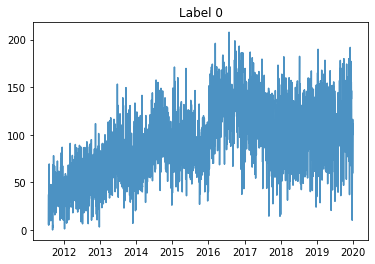

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

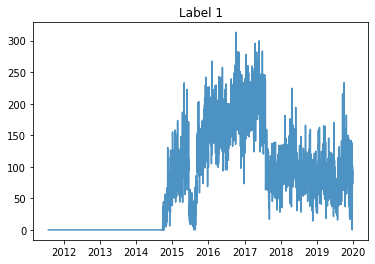

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

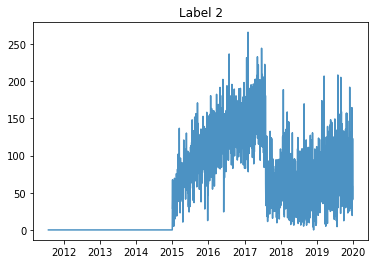

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

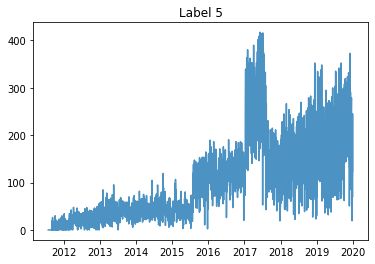

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

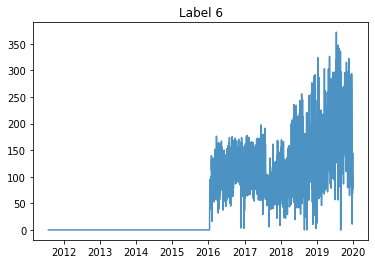

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

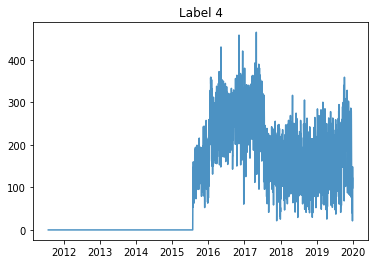

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

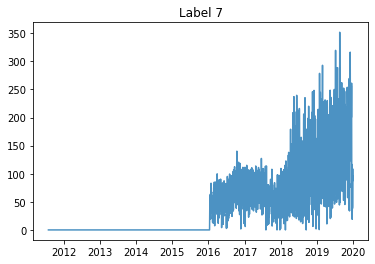

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

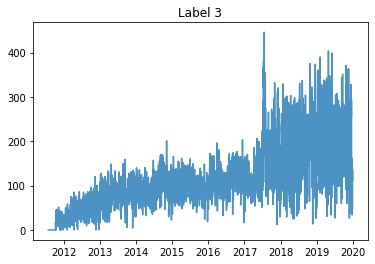

In [6]:
for l in df.Label.unique():
    
    plt.plot(df.index[df.Label == l],df["Energy (kWh)"][df.Label == l], alpha = 0.8)
    plt.title(f"Label {l}")
    plt.show()

In [7]:
df = df.fillna(0)

In [8]:
 df.drop(columns=['# Professional & Other Places',
           '# Food', '# Shop & Service', '# Travel & Transport',
           '# Outdoors & Recreation', '# Arts & Entertainment', '# Nightlife Spot',
           '# Residence', '# College & University', '# Event', 'Label_0',
           'Label_1', 'Label_2', 'Label_3', 'Label_4', 'Label_5', 'Label_6', 'Label_7']).head()

,Label,Charging Time (mins),Parking Time (mins),Energy (kWh),Fee (USD),Plugs,Month_Day_1,Month_Day_2,Month_Day_3,Month_Day_4,...,Year_Month_3,Year_Month_4,Year_Month_5,Year_Month_6,Year_Month_7,Year_Month_8,Year_Month_9,Year_Month_10,Year_Month_11,Year_Month_12
Date,,,,,,,,,,,,,,,,,,,,,
2011-07-29,0,114.050000,183.533333,6.249457,0.0,2.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2011-07-30,0,517.200000,686.650000,28.978653,0.0,2.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2011-07-31,0,647.866667,725.983333,37.209163,0.0,2.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2011-08-01,0,95.133333,203.566667,5.041244,0.0,2.0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2011-08-02,0,279.983333,280.316667,16.210423,0.0,4.0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [9]:
def create_data(X,y, pred_len, time_slot):

    Xs, ys = [], []

    for i in range(int(len(X) - pred_len - time_slot + 1)):
        X_start = i
        X_end = X_start + time_slot
        y_start = X_end
        y_end = y_start + pred_len
        v = X.iloc[X_start:X_end].values
        Xs.append(v)
        ys.append(y[y_start:y_end])

    return np.array(Xs), np.array(ys)


In [11]:
def standardize(t_train, t_test, t_val, v_train, v_test, v_val, *columns):
    t_train = np.array(t_train)
    t_test = np.array(t_test)
    t_val = np.array(t_val)
    
    v_train = np.array(v_train)
    v_test = np.array(v_test)
    v_val = np.array(v_val)
    
    statistics = {}
    
    for c in columns:
        first = t_train[0,:,c]
        rest = t_train[1:,-1:,c]
        series = np.append(first,rest)
        
        mu = series.mean()
        std = series.std()
        
        statistics[c] = (mu, std)
        
        t_train[:,:,c] = (t_train[:,:,c] - mu) / std
        t_test[:,:,c] = (t_test[:,:,c] - mu) / std
        t_val[:,:,c] = (t_val[:,:,c] - mu) / std
        
        if c == 3:
            v_train = ((v_train - mu) / std)
            v_test = ((v_test - mu) / std)
            v_val = ((v_val - mu) / std)
            
            
    return (tf.convert_to_tensor(t_train), tf.convert_to_tensor(t_test), tf.convert_to_tensor(t_val),
           tf.convert_to_tensor(v_train), tf.convert_to_tensor(v_test), tf.convert_to_tensor(v_val), statistics)
    
    
    

In [12]:
def get_until_not_zero(df):
    index = df[df["Energy (kWh)"] != 0].index[0]
    df = df.loc[index:]
    return df

In [13]:
def get_data(cluster, *columns):
    df_temporal = df.drop(columns=['# Professional & Other Places',
           '# Food', '# Shop & Service', '# Travel & Transport',
           '# Outdoors & Recreation', '# Arts & Entertainment', '# Nightlife Spot',
           '# Residence', '# College & University', '# Event', 'Label_0',
           'Label_1', 'Label_2', 'Label_3', 'Label_4', 'Label_5', 'Label_6', 'Label_7'])

    df_0 = df_temporal[df_temporal.Label == cluster]
    df_0 = get_until_not_zero(df_0)
    df_0 = df_0.sort_index()
    
    X = df_0
    y = df_0["Energy (kWh)"]

    X, y = create_data(X,y, 7, 150)
    
    split = [int(X.shape[0] * 0.9), int(X.shape[0] * 0.05), X.shape[0] - (int(X.shape[0] * 0.9) + int(X.shape[0] * 0.05))]
    
    #split = [X.shape[0] - (int(X.shape[0]*0.7) + int(X.shape[0]*0.2)), int(X.shape[0]*0.7), int(X.shape[0]*0.2)]



    X_train, X_val, X_test = tf.split(X, split)

    y_train, y_val, y_test = tf.split(y, split)

    X_train, X_test, X_val, y_train, y_test, y_val, statistics = standardize(X_train, X_test, X_val, y_train, y_test, y_val, 1,2,3,4)

    return (X_train, X_test, X_val, y_train, y_test, y_val, statistics)

In [14]:
import tensorflow as tf 

if tf.test.gpu_device_name(): 

    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))

else:

   print("Please install GPU version of TF")

Default GPU Device:/device:GPU:0


In [15]:
import tensorflow.keras.backend as K
from tensorflow.keras.applications import *
from tensorflow.keras.layers import LSTM, Dense, Input, Dropout, Bidirectional
from tensorflow.keras.models import *
from tensorflow import keras
from tensorflow.keras import regularizers

In [16]:
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1))

In [17]:
def LSTM_model(X_train, y_train, X_val, y_val):
    inputs_lstm = Input(shape=(150,56))
    x = LSTM(30, return_sequences = True, activation = "tanh")(inputs_lstm)
    x = Dropout(0.3)(x)
    x = LSTM(3, return_sequences = False, activation = "tanh")(x)
    outputs_lstm = Dense(1, kernel_regularizer=regularizers.l2(0.001))(x)
    

    model = keras.Model(inputs=inputs_lstm, outputs=outputs_lstm, name="LSTM_model")
    opt = keras.optimizers.Adam(lr=3e-4)
    model.compile(optimizer=opt, loss=["mae"], metrics=[rmse, "mae"])

    history = model.fit(X_train, y_train, epochs=256, batch_size = 128, validation_data = (X_val, y_val), verbose = 0)
    
    return model, history

In [18]:
def measure(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    print(f'rmse = {rmse}')

In [19]:
def evaluate_model(model, X_actual, y_actual, statistics, history):
    mu, std = statistics[3]
    y_actual = np.array(y_actual) * std + mu
    
    y_pred = np.array(model.predict(X_actual)).flatten() * std + mu
    
    measure(y_actual, y_pred)
    
    plt.figure(figsize = (15,10))
    plt.plot(df.iloc[:X_actual.shape[0]].index,y_actual, label = "Actual", c = cmap(0.2))
    plt.plot(df.iloc[:X_actual.shape[0]].index,y_pred, label = "Predictions", c = rmap(0.8))
    plt.title("Prediction vs. Actual (Validation Set)")
    plt.ylabel("Energy (kWh)")
    plt.legend()
    plt.show()
    
    plt.plot(history.history['loss'], c = cmap(0))
    plt.plot(history.history['val_loss'], c = cmap(0.8))
    plt.title('model train vs validation loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.show()

In [20]:
"""
1 : Charging Time
2 : Parking Time
3 : Energy
4 : Fee
"""

for i in range(1):
    X_train, X_test, X_val, y_train, y_test, y_val, standardize_statistics = get_data(i, 1,2,3,4)

    model, history = LSTM_model(X_train, y_train, X_val, y_val)

    evaluate_model(model, X_val, y_val, standardize_statistics, history)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KeyboardInterrupt: 

In [21]:
def build_model(hp):
    inputs_lstm = Input(shape=(150,56))

    for i in range(hp.Int("LSTM_layers",1,2)):
        if i == 0:
            x = LSTM(hp.Int(f"LSTM_{i}",1,55), return_sequences = True, activation = "tanh")(inputs_lstm)
            x = Dropout(hp.Float(f'lstm{i}_dropout', min_value=0, max_value=0.9, step=0.1))(x)
        else:
            x = LSTM(hp.Int(f"LSTM_{i}",1,55), return_sequences = True, activation = "tanh")(x)
            x = Dropout(hp.Float(f'lstm{i}_dropout', min_value=0, max_value=0.9, step=0.1))(x)

    
    x = LSTM(hp.Int(f"LSTM_last",1,10), return_sequences = False, activation = "tanh")(x)
    x = Dropout(hp.Float(f'Dense_dropout', min_value=0, max_value=0.9, step=0.1))(x)

    outputs_lstm = Dense(7, kernel_regularizer=regularizers.l2(hp.Float(f'lambda_l2', min_value=0, max_value=0.005, step=0.0001)))(x)


    model = keras.Model(inputs=inputs_lstm, outputs=outputs_lstm, name="LSTM_model")
    opt = keras.optimizers.Adam(hp.Float('learning_rate', 1e-4, 1e-2, sampling='log'))

    model.compile(optimizer=opt, loss='mse', metrics=[rmse])

    return model

In [22]:
import kerastuner as kt

tuner = kt.BayesianOptimization(
    build_model,
    objective=kt.Objective("val_rmse", direction="min"),
    max_trials = 100,
    directory='Modelling/HyperParameterTuning',
    project_name='LSTM_label_0')

INFO:tensorflow:Reloading Oracle from existing project Modelling/HyperParameterTuning/LSTM_label_0/oracle.json
INFO:tensorflow:Reloading Tuner from Modelling/HyperParameterTuning/LSTM_label_0/tuner0.json


In [214]:

def get_model_tuner(i):
    tuner = kt.BayesianOptimization(
        build_model,
        objective=kt.Objective("val_rmse", direction="min"),
        max_trials = 100,
        directory='Modelling/HyperParameterTuning',
        project_name=f'LSTM_label_{i}')
    X_train, X_test, X_val, y_train, y_test, y_val, standardize_statistics = get_data(i, 1,2,3,4)
    tuner.search(X_train, y_train,epochs=256, batch_size = 128, validation_data=(X_val, y_val), callbacks = [keras.callbacks.EarlyStopping(monitor = "val_rmse", patience = 20)])
    best_model = tuner.get_best_models(1)[0]
    return best_model

In [29]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

In [32]:
best_model_0 = tuner.get_best_models(1)[0]

In [33]:
X_train.shape

TensorShape([2629, 150, 56])

In [35]:
best_model_0.summary()

Model: "LSTM_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 56)]         0         
_________________________________________________________________
lstm (LSTM)                  (None, 150, 1)            232       
_________________________________________________________________
dropout (Dropout)            (None, 150, 1)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 150, 49)           9996      
_________________________________________________________________
dropout_1 (Dropout)          (None, 150, 49)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 10)                2400      
_________________________________________________________________
dropout_2 (Dropout)          (None, 10)                0

In [46]:
def evaluate_model(model, X_actual, y_actual, statistics):
    mu, std = statistics[3]
    y_actual = np.array(y_actual) * std + mu
    
    y_pred = np.array(model.predict(X_actual)) * std + mu
    
    measure(y_actual, y_pred)
    
    plt.figure(figsize = (15,10))
    plt.plot(df.iloc[:X_actual.shape[0]].index,y_actual, label = "Actual", c = cmap(0.2))
    plt.plot(df.iloc[:X_actual.shape[0]].index,y_pred, label = "Predictions", c = rmap(0.8))
    plt.title("Prediction vs. Actual (Validation Set)")
    plt.ylabel("Energy (kWh)")
    plt.legend()
    plt.show()

In [154]:
import datetime
import matplotlib.animation as animation
from IPython.display import HTML

<IPython.core.display.Javascript object>


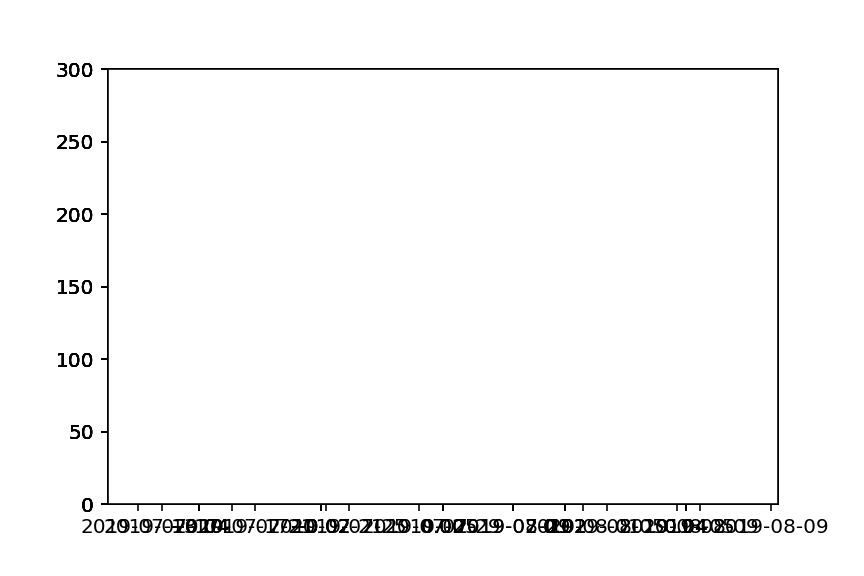

In [185]:
%matplotlib notebook

fig = plt.figure()


def init():
    ax = fig.add_subplot(111, ylim=(0,300))
    line = ax.plot([],[],"-",color = "black")[0]
    line2 = ax.plot([],[],"-",color = "blue",markersize =5)[0]
    line3 = ax.plot([],[],"-",color = "red",markersize =5)[0]

    return line, line2, line3,

def animate(index):
    pred_date = df[df["Energy (kWh)"].isin(np.array(y_test[index]) * standardize_statistics[3][1] + standardize_statistics[3][0])].index
    pred_start = pred_date[0]
    pred_end = pred_date[-1]
    energy = df["Energy (kWh)"][df.Label == 0].loc[pred_start - datetime.timedelta(days=20):pred_start]
    pred_actual = df["Energy (kWh)"][df.Label == 0].loc[pred_start:pred_end]
    
    #line.set_xdata(energy.index)
    line.set_ydata(energy)
    
    #line2.set_xdata(pred_actual.index)
    line2.set_ydata(pred_actual)
    
    line3.set_xdata(pred_date)
    line3.set_ydata(y_pred[index])
    print(type(line))
    return line, line2, line3,

ani = animation.FuncAnimation(fig, animate, init_func = init, frames=145,
                              interval=10, blit=True)



INFO:tensorflow:Reloading Oracle from existing project Modelling/HyperParameterTuning/LSTM_label_0/oracle.json
INFO:tensorflow:Reloading Tuner from Modelling/HyperParameterTuning/LSTM_label_0/tuner0.json
INFO:tensorflow:Oracle triggered exit


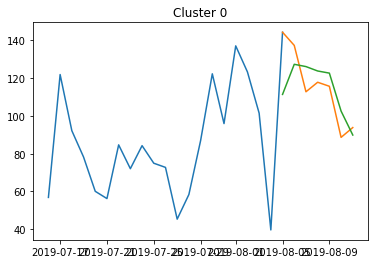

rmse = 28.560025081688725
INFO:tensorflow:Reloading Oracle from existing project Modelling/HyperParameterTuning/LSTM_label_1/oracle.json
INFO:tensorflow:Reloading Tuner from Modelling/HyperParameterTuning/LSTM_label_1/tuner0.json
INFO:tensorflow:Oracle triggered exit


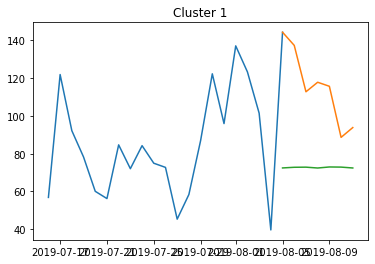

rmse = 45.616597573234536
INFO:tensorflow:Reloading Oracle from existing project Modelling/HyperParameterTuning/LSTM_label_2/oracle.json
INFO:tensorflow:Reloading Tuner from Modelling/HyperParameterTuning/LSTM_label_2/tuner0.json
INFO:tensorflow:Oracle triggered exit


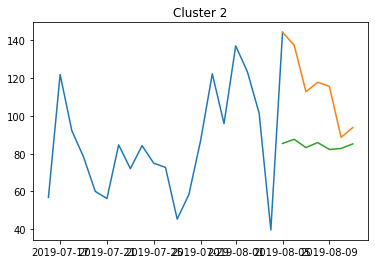

rmse = 41.52770787898356
INFO:tensorflow:Reloading Oracle from existing project Modelling/HyperParameterTuning/LSTM_label_3/oracle.json
INFO:tensorflow:Reloading Tuner from Modelling/HyperParameterTuning/LSTM_label_3/tuner0.json
INFO:tensorflow:Oracle triggered exit


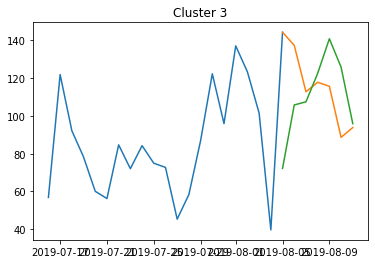

rmse = 38.67084719685947
INFO:tensorflow:Reloading Oracle from existing project Modelling/HyperParameterTuning/LSTM_label_4/oracle.json
INFO:tensorflow:Reloading Tuner from Modelling/HyperParameterTuning/LSTM_label_4/tuner0.json
INFO:tensorflow:Oracle triggered exit


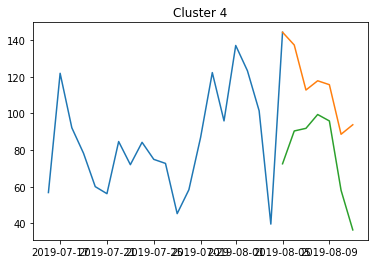

rmse = 33.63051616948659
INFO:tensorflow:Reloading Oracle from existing project Modelling/HyperParameterTuning/LSTM_label_5/oracle.json
INFO:tensorflow:Reloading Tuner from Modelling/HyperParameterTuning/LSTM_label_5/tuner0.json
INFO:tensorflow:Oracle triggered exit


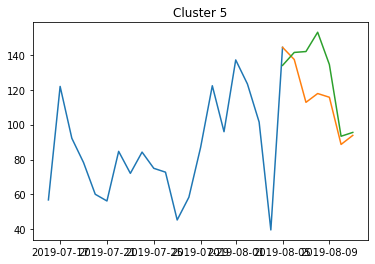

rmse = 31.45587655277888
INFO:tensorflow:Reloading Oracle from existing project Modelling/HyperParameterTuning/LSTM_label_6/oracle.json
INFO:tensorflow:Reloading Tuner from Modelling/HyperParameterTuning/LSTM_label_6/tuner0.json
INFO:tensorflow:Oracle triggered exit


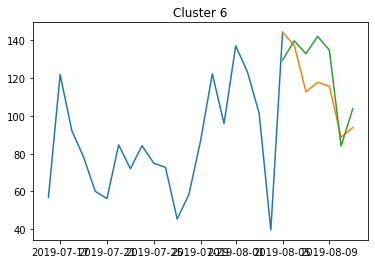

rmse = 40.10296870741265
INFO:tensorflow:Reloading Oracle from existing project Modelling/HyperParameterTuning/LSTM_label_7/oracle.json
INFO:tensorflow:Reloading Tuner from Modelling/HyperParameterTuning/LSTM_label_7/tuner0.json
INFO:tensorflow:Oracle triggered exit


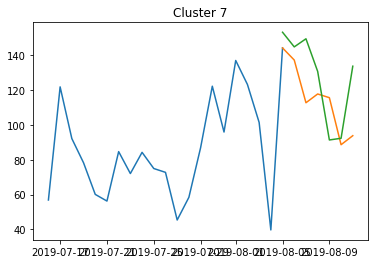

rmse = 42.07382258748101


In [215]:

%matplotlib inline
for i in range(8):
    best_model = get_model_tuner(i)
    y_pred = np.array(best_model.predict(X_test)) * standardize_statistics[3][1] + standardize_statistics[3][0]
    index = 4
    pred_date = df[df["Energy (kWh)"].isin(np.array(y_test[index]) * standardize_statistics[3][1] + standardize_statistics[3][0])].index
    pred_start = pred_date[0]
    pred_end = pred_date[-1]
    energy = df["Energy (kWh)"][df.Label == 0].loc[pred_start - datetime.timedelta(days=20):pred_start]
    pred_actual = df["Energy (kWh)"][df.Label == 0].loc[pred_start:pred_end]

    #line.set_xdata(energy.index)
    plt.plot(energy)

    #line2.set_xdata(pred_actual.index)
    plt.plot(pred_actual)
    plt.title(f"Cluster {i}")
    plt.plot(pred_date,y_pred[index])
    plt.show()

    measure(y_test * standardize_statistics[3][1] + standardize_statistics[3][0], y_pred)


In [189]:
%matplotlib notebook

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

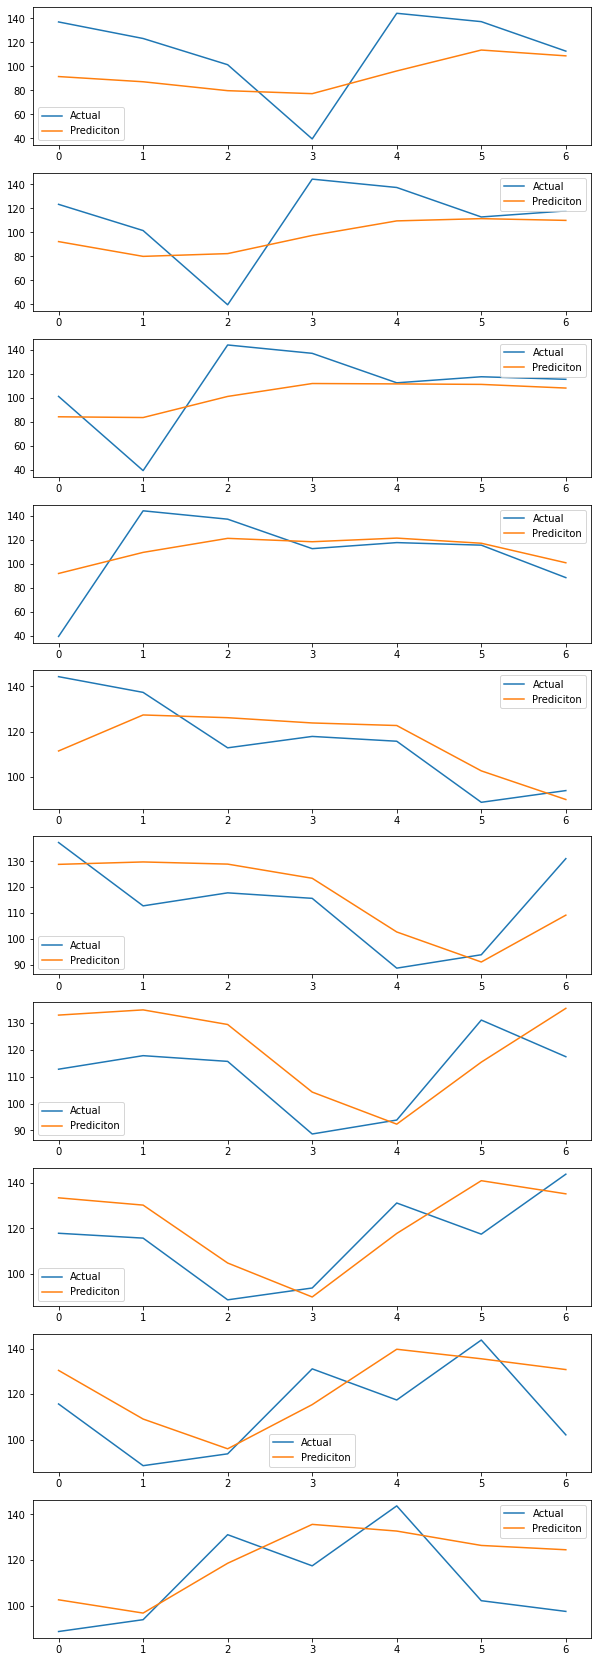

<IPython.core.display.Javascript object>

rmse = 28.560025081688725


In [69]:
fig, ax = plt.subplots(10, figsize = (10,30)) 

for i in range(10):
    ax[i].plot(y_test[i] * standardize_statistics[3][1] + standardize_statistics[3][0], label = "Actual")
    ax[i].plot(y_pred[i], label = "Prediciton")
    ax[i].legend()


plt.show()

measure(y_test * standardize_statistics[3][1] + standardize_statistics[3][0],y_pred)

In [99]:
X_val.shape

TensorShape([393, 30, 72])

In [38]:
model.predict(np.array(X_val[0]).reshape(1,30,55)).flatten()

<IPython.core.display.Javascript object>

array([0.6378917 , 0.7603719 , 0.64061445, 0.46418688, 0.20772085,
       0.20160247, 0.2805116 ], dtype=float32)

In [39]:
y_val[0]

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([0.66950166, 0.5540883 , 0.59683078, 0.48003308, 0.50014923,
       0.26801718, 0.36609081])>

<IPython.core.display.Javascript object>

array([ 0.6378917 ,  0.67385113,  0.6564464 ,  0.5371469 ,  0.2790102 ,
        0.13478853,  0.22353926,  0.34949145,  0.4250795 ,  0.44168845,
        0.33287737,  0.15133867,  0.06592181,  0.19255179,  0.32518286,
        0.4217484 ,  0.44900963,  0.3332884 ,  0.1964533 ,  0.24506217,
        0.43569657,  0.58953726,  0.6996622 ,  0.7080462 ,  0.5918648 ,
        0.4613247 ,  0.43155137,  0.5705789 ,  0.72015804,  0.7843601 ,
        0.79674524,  0.6362204 ,  0.4031814 ,  0.3723308 ,  0.5313116 ,
        0.6895469 ,  0.7841423 ,  0.7930539 ,  0.6959947 ,  0.59779984,
        0.58016765,  0.70451885,  0.79524046,  0.8364308 ,  0.8126597 ,
        0.6684901 ,  0.5050042 ,  0.48610964,  0.6285188 ,  0.7342079 ,
        0.80442095,  0.7926734 ,  0.6593713 ,  0.5203314 ,  0.48655555,
        0.6335072 ,  0.7687506 ,  0.8249311 ,  0.84425086,  0.74037766,
        0.4988301 ,  0.40372512,  0.5351336 ,  0.6578358 ,  0.74626166,
        0.71950215,  0.59311694,  0.4775639 ,  0.4861805 ,  0.62

<tf.Tensor: shape=(393,), dtype=float64, numpy=
array([ 0.66950166,  0.5540883 ,  0.59683078,  0.48003308,  0.50014923,
        0.26801718,  0.36609081,  0.54816458,  0.7110704 ,  0.57975004,
        0.90771443,  0.14996185,  0.3686247 ,  0.30541029,  0.52446971,
        0.66095069,  0.27944094,  0.9480286 ,  0.02251299,  0.41559847,
        0.10668924,  0.43045857,  0.4145959 ,  0.40603613,  0.696828  ,
        0.31797963,  0.65465553,  1.29921641,  0.39980154,  0.98785019,
        0.66509436,  0.65130465,  0.41159797, -0.03848289,  0.67243873,
        0.8863805 ,  0.52748722,  0.82673049,  0.71142377,  0.13692094,
        0.56354772,  0.3851185 ,  0.85821305,  0.83004929,  0.27070408,
        0.60817011,  0.32937144, -0.19799298,  1.22621153,  0.62877467,
        0.64930606,  0.68598941,  0.52308868,  0.39734524,  0.43029747,
        0.7009048 ,  0.94778751,  1.01715296,  0.73043076,  0.98766037,
        1.15887294, -0.14971328,  0.80770384,  0.91375452,  0.90158397,
        0.607207

In [52]:
r2_score(y_val[:,0],best_model.predict(np.array(X_val))[:,0])

<IPython.core.display.Javascript object>

0.20123323737521837

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

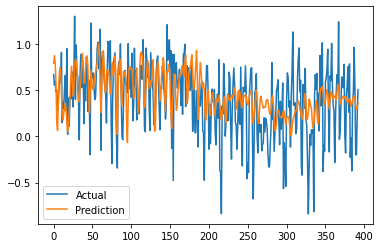

In [48]:

plt.plot(y_val[:,0], label = "Actual")
plt.plot(best_model.predict(np.array(X_val))[:,0], label = "Prediction")
plt.legend()
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

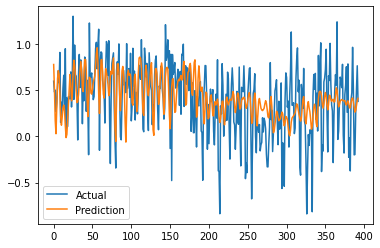

In [50]:
plt.plot(y_val[:,2], label = "Actual")
plt.plot(best_model.predict(np.array(X_val))[:,2], label = "Prediction")
plt.legend()
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

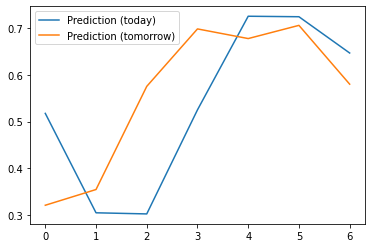

In [69]:
day = 94
plt.plot(model.predict(np.array(X_val[day]).reshape(1,30,55)).flatten(), label = "Prediction (today)")
plt.plot(model.predict(np.array(X_val[day + 1]).reshape(1,30,55)).flatten(), label = "Prediction (tomorrow)")
plt.legend()
plt.show()

In [73]:
preds = []
actual = []
for i in range(X_val.shape[0]):
    preds.append(model.predict(np.array(X_val[i]).reshape(1,30,55)).flatten()[0])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

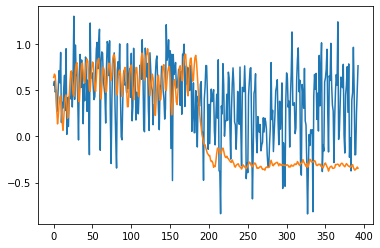

In [84]:
plt.plot(y_val[:,1])
plt.plot(preds)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

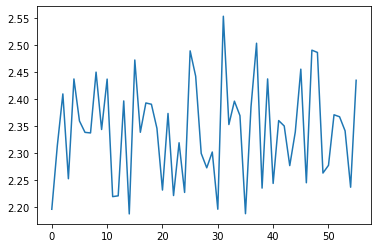

In [161]:

plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

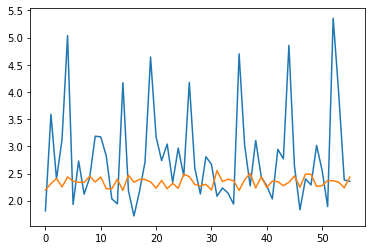

In [163]:
plt.plot(y_val[0])
plt.plot(model.predict(X_val)[0])
plt.show()

In [147]:
X_val[0]

<tf.Tensor: shape=(240, 81), dtype=float64, numpy=
array([[   6.        ,    2.34068723, -122.146     , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    2.78041914, -122.16      , ...,    0.        ,
           0.        ,    0.        ],
       [   5.        ,    3.03460329, -122.158     , ...,    0.        ,
           0.        ,    0.        ],
       ...,
       [   5.        ,    3.79337143, -122.158     , ...,    0.        ,
           0.        ,    1.        ],
       [   3.        ,    4.81968309, -122.11321931, ...,    0.        ,
           0.        ,    1.        ],
       [   1.        ,    2.44940629, -122.163     , ...,    0.        ,
           0.        ,    1.        ]])>

In [561]:
X_val[0][-1][1]

2.692439024390244

In [580]:
model.predict(np.array(df[-1458:-2]).reshape(1,1456,81))

<IPython.core.display.Javascript object>

array([[2.7247455]], dtype=float32)

In [584]:
X_val.shape

(63, 1456, 81)

In [611]:
float(model.predict(np.array(df[-1458:-2]).reshape(1,1456,81)))

<IPython.core.display.Javascript object>

2.724745512008667

In [612]:
df.iloc[-1]["Energy (kWh)"]

3.383807692307693

In [965]:
def predic():
    preds = []
    for i in range(100):
        pred = float(model.predict(np.array(df[-1358+i:-102+i]).reshape(1,1256,81)))
        preds.append(pred)
    
    return preds

In [967]:
preds = predic()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [968]:
r2_score(np.array(df[-101:-1]["Energy (kWh)"]),np.array(preds))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

-4.731077014302545

In [969]:
preds = []
for i in range(X_val.shape[0]):
    pred = model.predict(np.array(X_val[i]).reshape(1,1456,81))
    preds.append(float(pred))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [970]:
preds

[0.5611644983291626,
 0.5701436996459961,
 0.5911750197410583,
 0.5864356756210327,
 0.5948604941368103,
 0.6334630846977234,
 0.5695988535881042,
 0.5648144483566284,
 0.5442633628845215,
 0.4975155293941498,
 0.5873321294784546,
 0.6605113744735718,
 0.5594258308410645,
 0.6802462935447693,
 0.5902557969093323,
 0.6363338828086853,
 0.645184338092804,
 0.6324993371963501,
 0.6544402837753296,
 0.5992485284805298,
 0.5528717041015625,
 0.5810484886169434,
 0.6608498096466064,
 0.6520194411277771,
 0.6644423604011536,
 0.6175932288169861,
 0.6048698425292969,
 0.6740634441375732,
 0.5644179582595825,
 0.636368453502655,
 0.62565678358078,
 0.7037426233291626,
 0.6325733065605164,
 0.6466323137283325,
 0.692121684551239,
 0.5724148750305176,
 0.5354454517364502,
 0.6129343509674072,
 0.6178449988365173,
 0.6450437307357788,
 0.5890757441520691,
 0.5898423194885254,
 0.6192377209663391,
 0.5511139035224915,
 0.6237726211547852,
 0.6506972312927246,
 0.6842180490493774,
 0.696781158447265

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

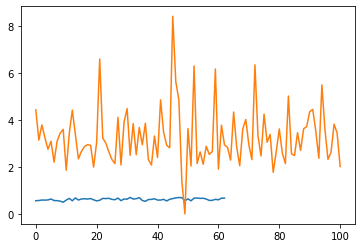

In [971]:
plt.plot(preds)
plt.plot(np.array(df[-102:-1]["Energy (kWh)"]))

## Bayesian Hyperparamter Tuning

In [973]:
import kerastuner as kt

In [974]:
def model_builder(hp):
    model = Sequential()
    mod
    for i in range(hp.Int('LSTM_layers',1,3)):
        model.add(LSTM(hp.Int(f'lstm{i}_units', min_value=10, max_value=80, step=5), return_sequences = True, activation = "tanh"))
        model.add(Dropout(hp.Float(f'lstm{i}_dropout', min_value=0, max_value=0.9, step=0.1)))
    
    for i in range(hp.Int('Dense_layers',1,3)):
        model.add(Dense(hp.Int(f'dense{i}_units', min_value=5, max_value=65, step=5), activation = "relu"))
        model.add(Dropout(hp.Float(f'dense{i}_dropout', min_value=0, max_value=0.9, step=0.1)))
    
    model.add(Dense(1))
    opt = keras.optimizers.Adam(hp.Float('learning_rate', 1e-4, 1e-2, sampling='log'))
    model.compile(optimizer=opt, loss = 'mse', metrics=['mae'])
    
    return model

In [975]:
def model_builder(hp):

    inputs = Input(shape=(None,81))
    
    x = LSTM(hp.Int('lstm0_units', min_value=20, max_value=60, step=2), return_sequences = True, activation = "tanh")(inputs)
    x = Dropout(hp.Float(f'lstm0_dropout', min_value=0, max_value=0.9, step=0.1))(x)
    
    lstm_layers = hp.Int('LSTM_layers',1,2)
    for i in range(lstm_layers):
        if i == max(range(lstm_layers)):
            x = LSTM(hp.Int(f'lstm{i + 1}_units', min_value=4, max_value=38, step=2), return_sequences = False, activation = "tanh")(x)
        else:
            x = LSTM(hp.Int(f'lstm{i + 1}_units', min_value=4, max_value=38, step=2), return_sequences = True, activation = "tanh")(x)
        x = Dropout(hp.Float(f'lstm{i + 1}_dropout', min_value=0, max_value=0.9, step=0.1))(x)
    
    for i in range(hp.Int('Dense_layers',0,3)):
        x = Dense(hp.Int(f'dense_units_{i}', min_value=1, max_value=15, step=1), activation="relu")(x)
        x = Dropout(hp.Float(f'dense{i}_dropout', min_value=0, max_value=0.9, step=0.1))(x)


    outputs = Dense(1)(x)

    m = keras.Model(inputs=inputs, outputs=outputs, name="LSTM_model")
    
    opt = keras.optimizers.Adam(hp.Float('learning_rate', 1e-4, 1e-2, sampling='log'))
    m.compile(optimizer=opt, loss='mse', metrics=["mae"])

    return m

In [976]:
tuner = kt.BayesianOptimization(model_builder,
                     objective='val_mae',
                     max_trials = 100,
                     directory='Modelling/HyperParameterTuning',
                     project_name='LSTM_small')

In [977]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

<IPython.core.display.Javascript object>

In [934]:
y_val.shape

(63, 8)

In [978]:
tuner.search(X_train_new, y_train_new, epochs=100 , batch_size=1, validation_data=(X_val_new,y_val_new), callbacks=[stop_early])


# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]


Trial 32 Complete [02h 52m 49s]
val_mae: 0.6668657064437866

Best val_mae So Far: 0.6231744289398193
Total elapsed time: 21h 16m 20s

Search: Running Trial #33

Hyperparameter    |Value             |Best Value So Far 
lstm0_units       |50                |58                
lstm0_dropout     |0.9               |0.9               
LSTM_layers       |1                 |1                 
lstm1_units       |38                |14                
lstm1_dropout     |0.9               |0.9               
Dense_layers      |3                 |2                 
learning_rate     |0.0001            |0.0001            
lstm2_units       |4                 |4                 
lstm2_dropout     |0                 |0.3               
dense_units_0     |1                 |1                 
dense0_dropout    |0                 |0                 
dense_units_1     |1                 |1                 
dense1_dropout    |0.9               |0                 
dense_units_2     |1                 |1  

KeyboardInterrupt: 